In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ratings_db.csv')

In [3]:
df.head()

,id,user_id,movie_id,rating,rated_at
0,1,196,242,3,1997-12-04 07:55:49
1,2,186,302,3,1998-04-04 11:22:22
2,3,22,377,1,1997-11-06 23:18:36
3,4,244,51,2,1997-11-26 21:02:03
4,5,166,346,1,1998-02-01 21:33:16


In [4]:
movie_titles = pd.read_csv('movies_db.csv')

In [5]:
movie_titles.head()

,id,title,release_date
0,1,Toy Story (1995),1995-01-01
1,2,GoldenEye (1995),1995-01-01
2,3,Four Rooms (1995),1995-01-01
3,4,Get Shorty (1995),1995-01-01
4,5,Copycat (1995),1995-01-01


In [6]:
movie_titles = movie_titles.rename(columns = {"id": "movie_id"})
movie_titles.head()


,movie_id,title,release_date
0,1,Toy Story (1995),1995-01-01
1,2,GoldenEye (1995),1995-01-01
2,3,Four Rooms (1995),1995-01-01
3,4,Get Shorty (1995),1995-01-01
4,5,Copycat (1995),1995-01-01


In [7]:
df = pd.merge(df, movie_titles, on = 'movie_id')
df.head()

,id,user_id,movie_id,rating,rated_at,title,release_date
0,1,196,242,3,1997-12-04 07:55:49,Kolya (1996),1997-01-24
1,254,63,242,3,1997-10-01 16:06:30,Kolya (1996),1997-01-24
2,630,226,242,5,1998-01-03 20:37:51,Kolya (1996),1997-01-24
3,1233,154,242,3,1997-11-09 21:03:55,Kolya (1996),1997-01-24
4,2160,306,242,5,1997-10-10 10:16:33,Kolya (1996),1997-01-24


In [8]:
df.describe()

,id,user_id,movie_id,rating
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,462.48475,425.530130,3.529860
std,28867.657797,266.61442,330.798356,1.125674
min,1.000000,1.00000,1.000000,1.000000
25%,25000.750000,254.00000,175.000000,3.000000
50%,50000.500000,447.00000,322.000000,4.000000
75%,75000.250000,682.00000,631.000000,4.000000
max,100000.000000,943.00000,1682.000000,5.000000


In [9]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


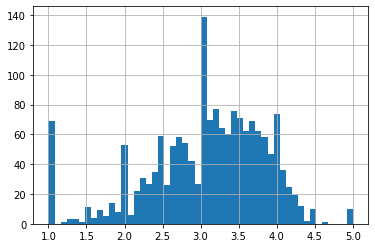

In [12]:
%matplotlib inline
ratings['rating'].hist(bins = 50)

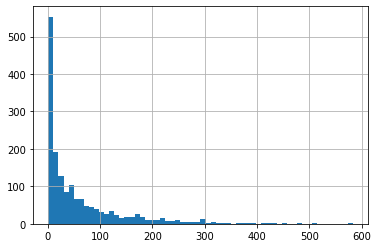

In [13]:
ratings['number_of_ratings'].hist(bins= 60)

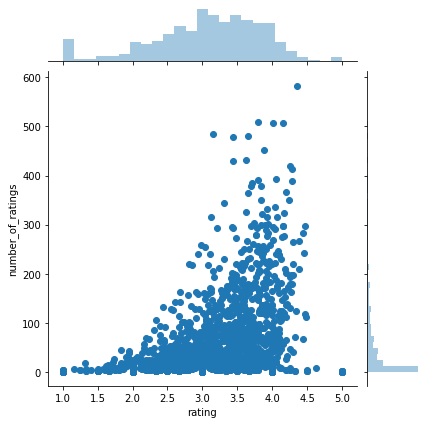

In [16]:
sns.jointplot(x ='rating', y ='number_of_ratings', data = ratings)

In [17]:
movie_matrix = df.pivot_table(index='user_id' , columns='title' , values ='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Б kцldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [18]:
ratings.sort_values('number_of_ratings', ascending = False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [23]:
AFO_movie_rating = movie_matrix["Air Force One (1997)"]
Contact_movie_rating = movie_matrix["Contact (1997)"]
AFO_movie_rating.head()


user_id
1    NaN
2    4.0
3    2.0
4    5.0
5    NaN
Name: Air Force One (1997), dtype: float64

In [24]:
Contact_movie_rating.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [26]:
similar_to_AFO = movie_matrix.corrwith(AFO_movie_rating)
similar_to_AFO.head()

title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [28]:
similar_to_Contact = movie_matrix.corrwith(Contact_movie_rating)
similar_to_Contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [31]:
corr_Contact = pd.DataFrame(similar_to_Contact, columns = ['Correlation'])
corr_Contact.dropna(inplace = True)
corr_Contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [32]:
corr_AFO = pd.DataFrame(similar_to_AFO, columns = ['Correlation'])
corr_AFO.dropna(inplace = True)
corr_AFO.head()

,Correlation
title,
'Til There Was You (1997),0.867722
101 Dalmatians (1996),0.221943
12 Angry Men (1957),0.228031
187 (1997),0.294232
2 Days in the Valley (1996),0.043847


In [33]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_Contact = corr_Contact.join(ratings['number_of_ratings'])
corr_AFO.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.867722,9
101 Dalmatians (1996),0.221943,109
12 Angry Men (1957),0.228031,125
187 (1997),0.294232,41
2 Days in the Valley (1996),0.043847,93


In [34]:
corr_Contact.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [36]:
corr_AFO[corr_AFO['number_of_ratings']>100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
"Firm, The (1993)",0.526743,151
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206
Absolute Power (1997),0.497411,127
"Rock, The (1996)",0.493542,378
"Long Kiss Goodnight, The (1996)",0.490233,185
Crimson Tide (1995),0.481205,154
